<a href="https://colab.research.google.com/github/anniew5/anniew5/blob/main/htn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [41]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [42]:
import tensorflow as tf
import os

In [43]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


In [44]:
tf.config.list_physical_devices('GPU')

[]

In [45]:
import cv2
import imghdr

In [46]:
data_dir = 'htn'

In [47]:
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [48]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [49]:
import numpy as np
from matplotlib import pyplot as plt

In [71]:
from tensorflow.keras.optimizers import RMSprop

In [72]:
from keras.models import Sequential

In [73]:
from tensorflow.python.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.python.keras.models import Model

In [74]:
from keras.preprocessing import image

In [93]:
# Create an image dataset from the directory
try:
    data = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        image_size=(128, 128),  # Specify image size first
        batch_size=2,          # Then specify batch size
        validation_split=0.2,   # Adjust validation split as needed
        subset='training',
        seed=42                # Specify a seed for reproducibility
    )

    validation_data = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        image_size=(128, 128),  # Specify image size first
        batch_size=2,
        validation_split=0.2,
        subset='validation',
        seed=42                # Specify the same seed for validation data
    )

    class_names = data.class_names

    # Continue with model building and training as described in the previous response

except Exception as e:
    print(f"An error occurred: {str(e)}")


Found 26 files belonging to 7 classes.
Using 21 files for training.
Found 26 files belonging to 7 classes.
Using 5 files for validation.


In [101]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(data, validation_data=validation_data, epochs=20)


Epoch 1/20
11/11 [==============================] - 3s 182ms/step - loss: 395.9723 - accuracy: 0.0476 - val_loss: 3.8683 - val_accuracy: 0.2000
Epoch 2/20
11/11 [==============================] - 3s 240ms/step - loss: 1.2228 - accuracy: 0.6667 - val_loss: 2.0005 - val_accuracy: 0.4000
Epoch 3/20
11/11 [==============================] - 2s 171ms/step - loss: 0.2075 - accuracy: 0.9524 - val_loss: 7.8859 - val_accuracy: 0.2000
Epoch 4/20
11/11 [==============================] - 2s 175ms/step - loss: 1.2156 - accuracy: 0.7143 - val_loss: 2.5302 - val_accuracy: 0.8000
Epoch 5/20
11/11 [==============================] - 2s 170ms/step - loss: 1.6182 - accuracy: 0.8095 - val_loss: 3.7641 - val_accuracy: 0.8000
Epoch 6/20
11/11 [==============================] - 2s 167ms/step - loss: 4.2763 - accuracy: 0.7143 - val_loss: 5.3364 - val_accuracy: 0.0000e+00
Epoch 7/20
11/11 [==============================] - 2s 195ms/step - loss: 1.1836 - accuracy: 0.7143 - val_loss: 3.2656 - val_accuracy: 0.2000


NameError: ignored

In [103]:
history = model.history

In [95]:
# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(validation_data)
print(f'Validation accuracy: {accuracy * 100:.2f}%')

3/3 [==============================] - 0s 17ms/step - loss: 1.2227 - accuracy: 0.6000
Validation accuracy: 60.00%


In [99]:
import matplotlib.pyplot as plt

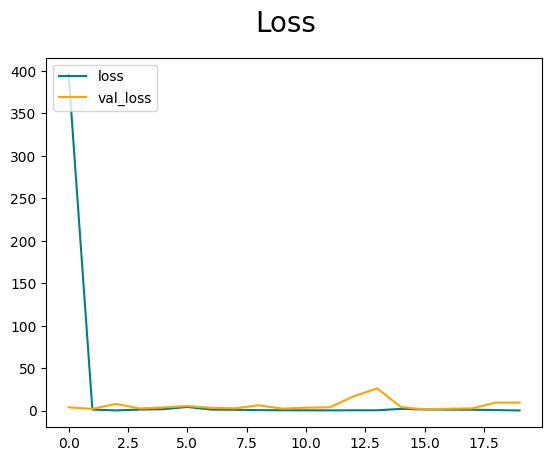

In [105]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

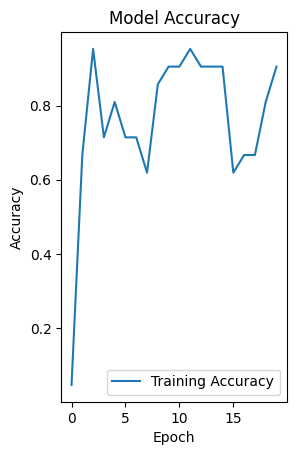

In [107]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

1/1 [==============================] - 1s 629ms/step


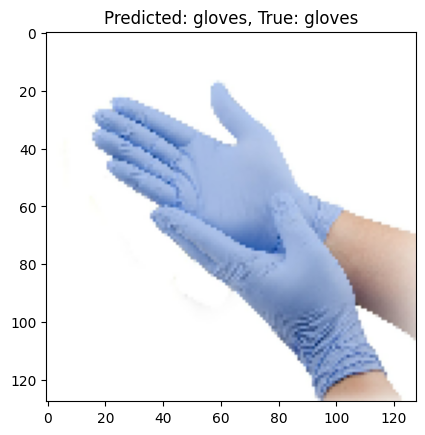

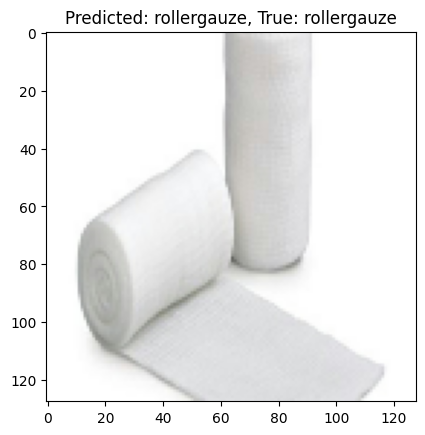

1/1 [==============================] - 0s 115ms/step


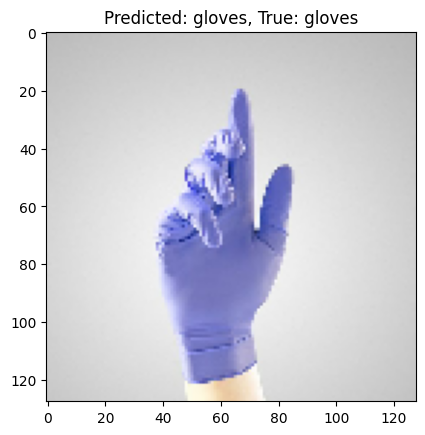

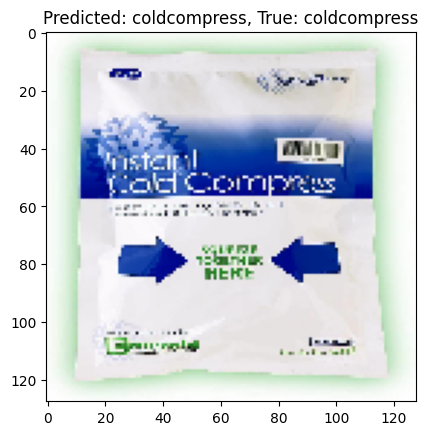

1/1 [==============================] - 0s 73ms/step


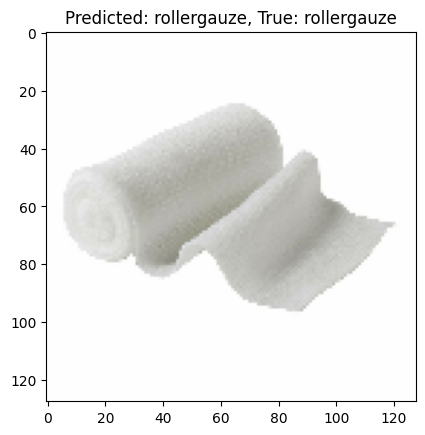

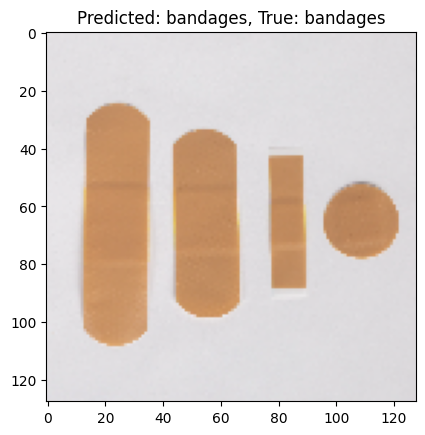

1/1 [==============================] - 0s 68ms/step


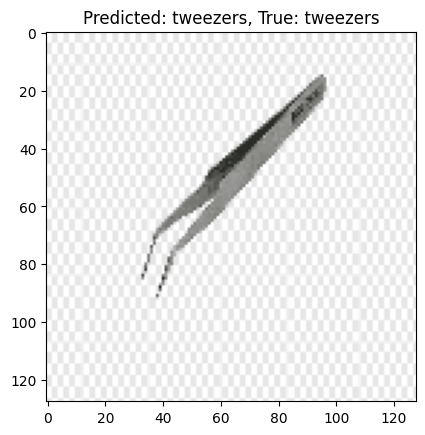

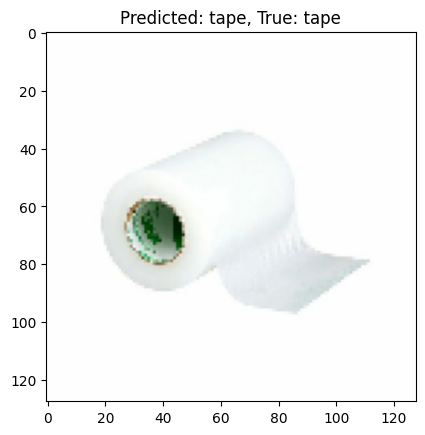

1/1 [==============================] - 0s 96ms/step


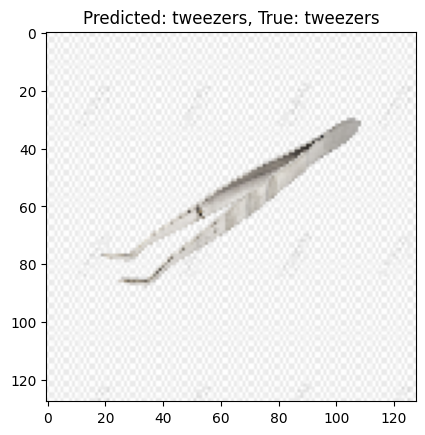

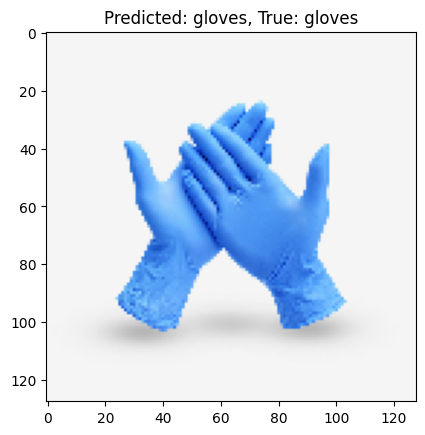

1/1 [==============================] - 0s 148ms/step


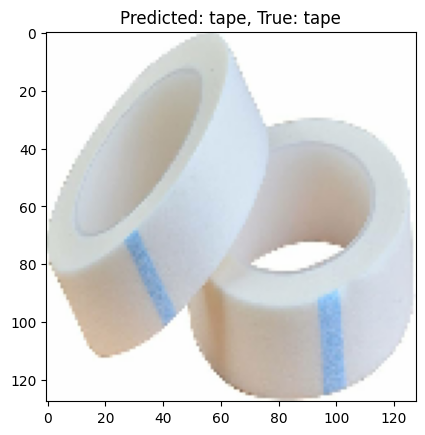

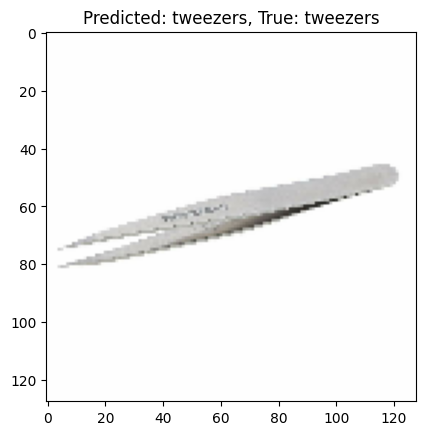

1/1 [==============================] - 0s 37ms/step


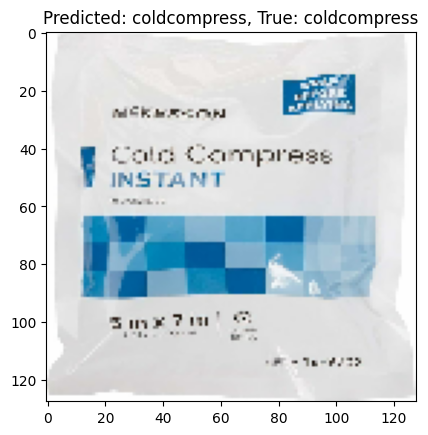

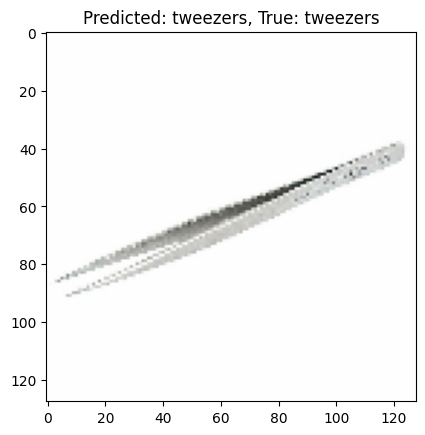

1/1 [==============================] - 0s 38ms/step


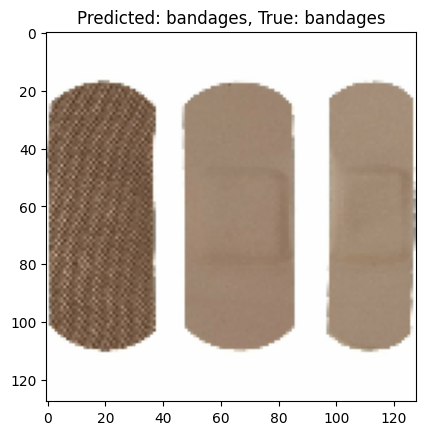

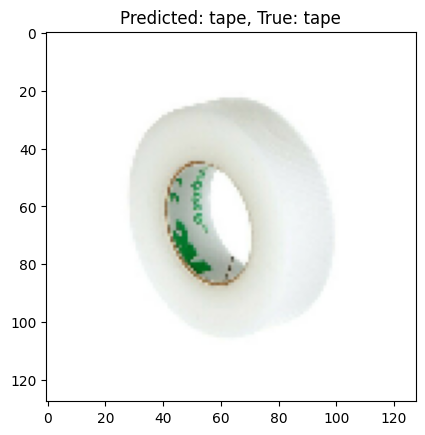

1/1 [==============================] - 0s 39ms/step


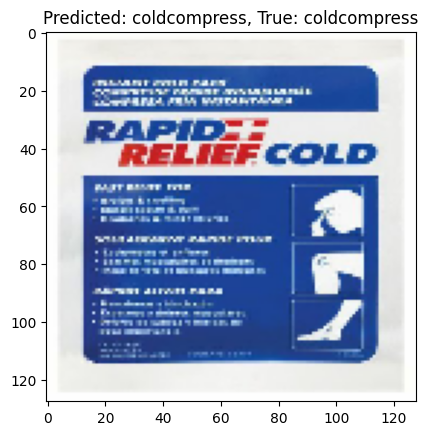

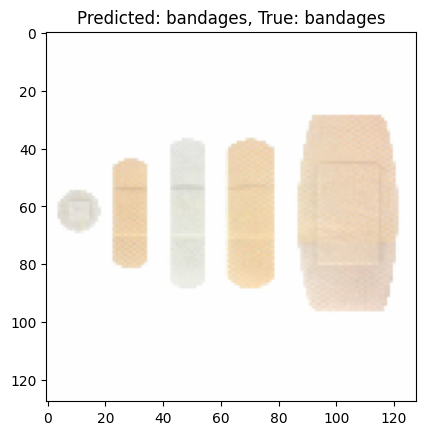

1/1 [==============================] - 0s 38ms/step


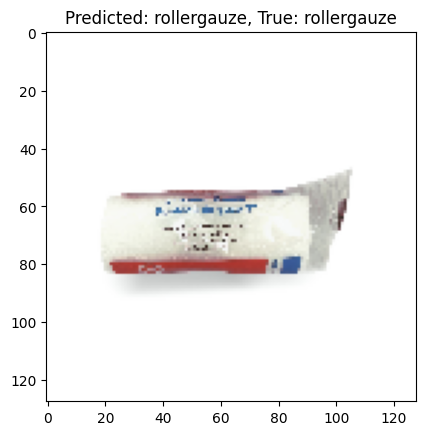

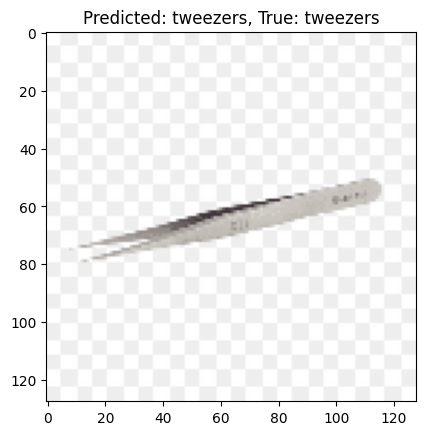

1/1 [==============================] - 0s 52ms/step


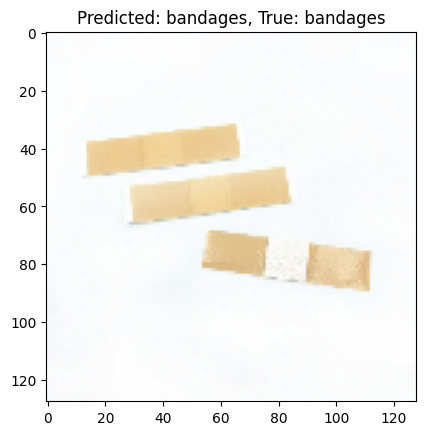

In [97]:

for images, labels in data:
    predictions = model.predict(images)
    predicted_labels = tf.argmax(predictions, axis=1)

    # Iterate through the batch and display each image along with its predicted label
    for i in range(len(images)):
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f'Predicted: {class_names[predicted_labels[i]]}, True: {class_names[labels[i]]}')
        plt.show()

In [114]:
model.save('htn')
